In [121]:
import pandas as pd
import numpy as np
import sys

In [122]:
df = pd.read_csv('war_projected_scores_new.csv')
cols = df.columns.tolist()
new_cols = [c.replace('entity1', 'Israel').replace('entity2', 'Palestine').replace('entity3', 'Hamas') for c in cols]
df = df.rename(columns = dict(zip(cols, new_cols)))

In [123]:
df.media_name.value_counts()

foxnews.com      8334
aljazeera.com    5277
Name: media_name, dtype: int64

In [124]:
df_fox = df[df.media_name == 'foxnews.com']
df_aljazeera = df[df.media_name == 'aljazeera.com']

In [125]:
df_fox['date'] = pd.to_datetime(df_fox['publish_date'], format='%Y-%m-%d')
df_aljazeera['date'] = pd.to_datetime(df_aljazeera['publish_date'], format='%Y-%m-%d')

/tmp/ipykernel_137342/2247188087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fox['date'] = pd.to_datetime(df_fox['publish_date'], format='%Y-%m-%d')
/tmp/ipykernel_137342/2247188087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aljazeera['date'] = pd.to_datetime(df_aljazeera['publish_date'], format='%Y-%m-%d')


In [126]:
weekly_df_fox = df_fox.groupby(pd.Grouper(key='date', freq='W')).mean()
weekly_df_aljazeera = df_aljazeera.groupby(pd.Grouper(key='date', freq='W')).mean()

In [127]:
weekly_df_fox.columns

Index(['Israel_care', 'Palestine_care', 'Hamas_care', 'Israel_fairness',
       'Palestine_fairness', 'Hamas_fairness', 'Israel_loyalty',
       'Palestine_loyalty', 'Hamas_loyalty', 'Israel_authority',
       'Palestine_authority', 'Hamas_authority', 'Israel_sanctity',
       'Palestine_sanctity', 'Hamas_sanctity'],
      dtype='object')

In [128]:
# e = 1
# f = 'care'
# col = f'entity{e}_{f}'

In [129]:
attr = 'care'
weekly_df_fox[[f'Israel_{attr}', f'Palestine_{attr}', f'Hamas_{attr}']].shape

(50, 3)

In [131]:
df.describe()

,Israel_care,Palestine_care,Hamas_care,Israel_fairness,Palestine_fairness,Hamas_fairness,Israel_loyalty,Palestine_loyalty,Hamas_loyalty,Israel_authority,Palestine_authority,Hamas_authority,Israel_sanctity,Palestine_sanctity,Hamas_sanctity
count,5150.000000,3539.000000,2485.000000,5150.000000,3539.000000,2485.000000,5150.000000,3539.000000,2485.000000,5150.000000,3539.000000,2485.000000,5150.000000,3539.000000,2485.000000
mean,0.142595,0.091346,0.119855,-0.187373,-0.176809,-0.051622,-0.246518,-0.184761,-0.160335,0.108241,0.138703,-0.005042,-0.070881,-0.162450,0.016043
std,0.217868,0.191874,0.220502,0.216473,0.184695,0.230288,0.213717,0.218861,0.248992,0.226111,0.218374,0.257508,0.216706,0.209673,0.249280
min,-1.000000,-0.818973,-0.581891,-0.976267,-1.000000,-0.928711,-0.971478,-0.895915,-1.000000,-0.968814,-1.000000,-0.735498,-0.990544,-1.000000,-0.986875
25%,0.015815,-0.024181,-0.032992,-0.332817,-0.294555,-0.189162,-0.389971,-0.324682,-0.299934,-0.041396,0.002277,-0.179404,-0.212754,-0.303301,-0.135830
50%,0.151712,0.107935,0.119627,-0.197523,-0.185734,-0.031787,-0.257347,-0.202514,-0.145119,0.114283,0.161668,-0.028095,-0.071976,-0.174740,0.038289
75%,0.280984,0.216656,0.262063,-0.049295,-0.066508,0.102989,-0.113264,-0.056621,-0.003740,0.252471,0.282452,0.144492,0.065753,-0.024783,0.186534
max,0.882527,0.975932,1.000000,1.000000,0.786223,0.604094,0.818090,1.000000,0.625349,0.835781,0.820084,1.000000,1.000000,0.672971,0.670151


In [132]:
def plot(df, attr):
    
    df[[f'Israel_{attr}', f'Palestine_{attr}', f'Hamas_{attr}']].dropna().plot(figsize=(20, 5))

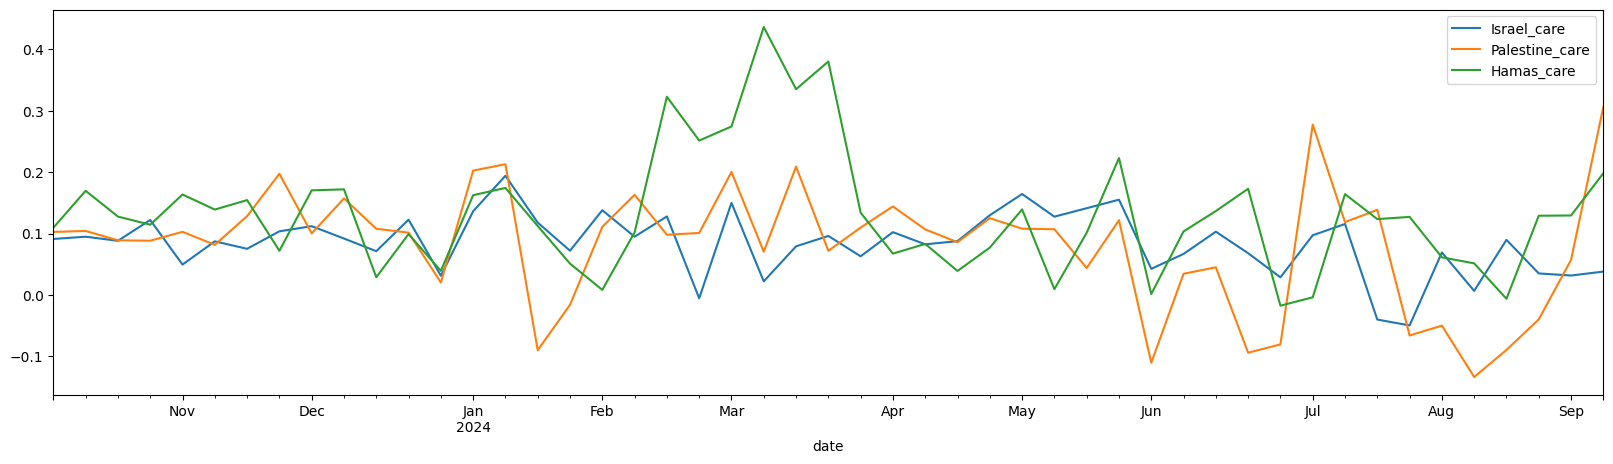

In [133]:
plot(weekly_df_fox, 'care')

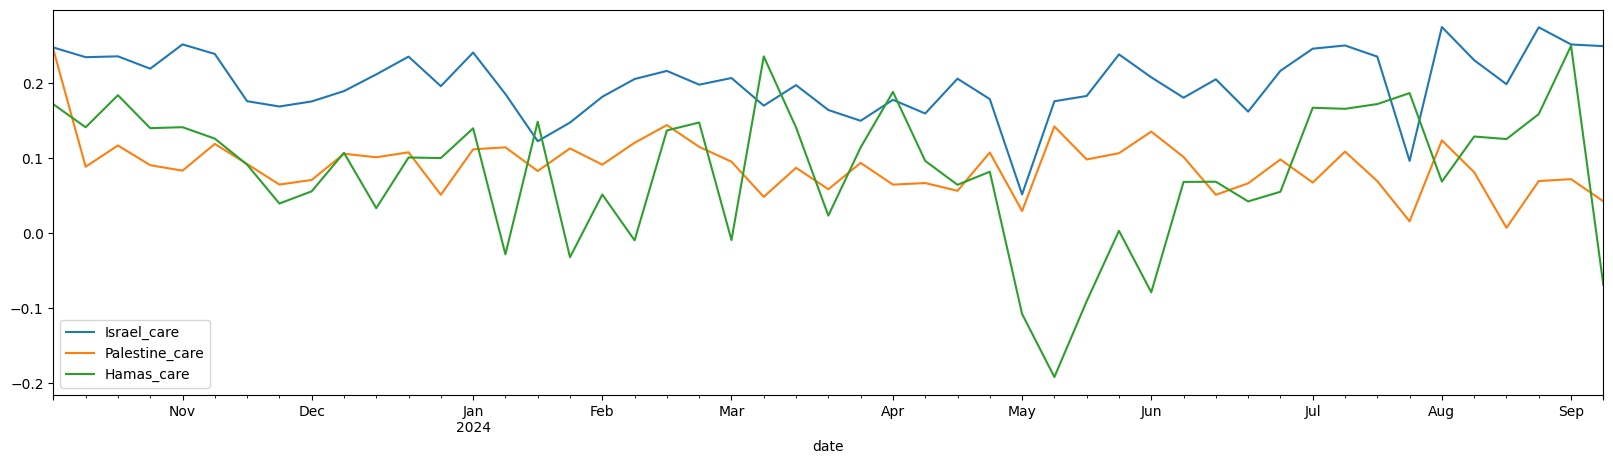

In [134]:
plot(weekly_df_aljazeera, 'care')

In [12]:
df_fox.describe()

,entity1_care,entity2_care,entity3_care,entity1_fairness,entity2_fairness,entity3_fairness,entity1_loyalty,entity2_loyalty,entity3_loyalty,entity1_authority,entity2_authority,entity3_authority,entity1_sanctity,entity2_sanctity,entity3_sanctity
count,2538.000000,862.000000,1236.000000,2538.000000,862.000000,1236.000000,2538.000000,862.000000,1236.000000,2538.000000,862.000000,1236.000000,2538.000000,862.000000,1236.000000
mean,0.550773,0.533235,0.565933,0.464880,0.465740,0.539895,0.373557,0.384276,0.444567,0.590803,0.611056,0.523853,0.571498,0.523202,0.599846
std,0.115456,0.101047,0.102668,0.114226,0.095381,0.096399,0.100377,0.099815,0.095053,0.112483,0.107682,0.105519,0.123898,0.113963,0.118364
min,0.108356,0.084883,0.207867,0.080642,0.120013,0.175664,0.053541,0.084741,0.059861,0.172491,0.191134,0.185947,0.005641,0.154955,0.099018
25%,0.476116,0.478112,0.501777,0.387945,0.405030,0.480058,0.305743,0.319964,0.376302,0.521955,0.545900,0.460035,0.492390,0.443955,0.532560
50%,0.560846,0.538968,0.571682,0.456633,0.463142,0.537823,0.365486,0.373656,0.442430,0.599000,0.617586,0.526511,0.567093,0.518521,0.605529
75%,0.627742,0.597415,0.633593,0.539865,0.521865,0.603514,0.433290,0.445475,0.497607,0.666092,0.682191,0.592702,0.647498,0.602541,0.673384
max,0.913685,0.850857,0.929958,0.972435,0.937589,0.873392,0.799894,0.866258,0.809965,0.995625,0.988812,0.983336,1.000000,0.921088,0.971878


In [13]:
df_aljazeera.describe()

,entity1_care,entity2_care,entity3_care,entity1_fairness,entity2_fairness,entity3_fairness,entity1_loyalty,entity2_loyalty,entity3_loyalty,entity1_authority,entity2_authority,entity3_authority,entity1_sanctity,entity2_sanctity,entity3_sanctity
count,2347.000000,2467.000000,334.000000,2347.000000,2467.000000,334.000000,2347.000000,2467.000000,334.000000,2347.000000,2467.000000,334.000000,2347.000000,2467.000000,334.000000
mean,0.600659,0.528316,0.515370,0.413322,0.450640,0.576228,0.352480,0.409077,0.447118,0.631566,0.617549,0.495695,0.527208,0.496535,0.647871
std,0.120806,0.111871,0.105486,0.113885,0.106131,0.093382,0.110374,0.113256,0.097078,0.121926,0.120280,0.108046,0.123269,0.126078,0.118874
min,0.192871,0.000000,0.223077,0.000000,0.040118,0.249202,0.000000,0.038328,0.223741,0.218440,0.000000,0.220326,0.094787,0.000000,0.192858
25%,0.520760,0.457764,0.444575,0.335362,0.382702,0.521732,0.277718,0.336693,0.377230,0.546423,0.539704,0.421468,0.443410,0.411850,0.570651
50%,0.598592,0.541449,0.518504,0.413162,0.445859,0.571998,0.350992,0.400223,0.426487,0.628084,0.632613,0.509479,0.529823,0.485058,0.643394
75%,0.683150,0.602183,0.584126,0.493355,0.514597,0.644884,0.424929,0.477189,0.509548,0.710576,0.698763,0.572484,0.616315,0.577421,0.738537
max,1.000000,0.890354,0.809581,0.780244,1.000000,0.830485,0.817563,1.000000,0.780421,1.000000,0.957951,0.776875,0.948980,0.916766,0.935032


In [14]:
df_fox.columns

Index(['media_name', 'publish_date', 'title', 'entity1_care', 'entity2_care',
       'entity3_care', 'entity1_fairness', 'entity2_fairness',
       'entity3_fairness', 'entity1_loyalty', 'entity2_loyalty',
       'entity3_loyalty', 'entity1_authority', 'entity2_authority',
       'entity3_authority', 'entity1_sanctity', 'entity2_sanctity',
       'entity3_sanctity'],
      dtype='object')